## Sales Prediction 
## By-Prathamesh Dubbewar

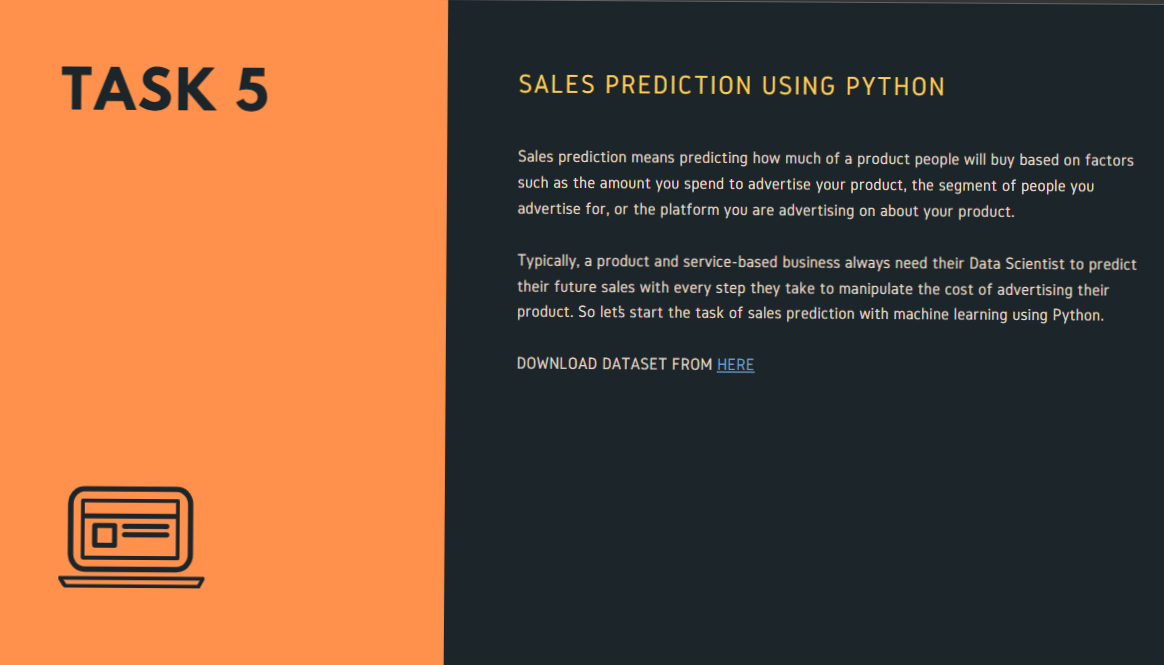

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('SalesPrediction.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [25]:
df.shape

(200, 5)

In [26]:
df=df.iloc[:,1:]
df.tail

<bound method NDFrame.tail of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [27]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [28]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

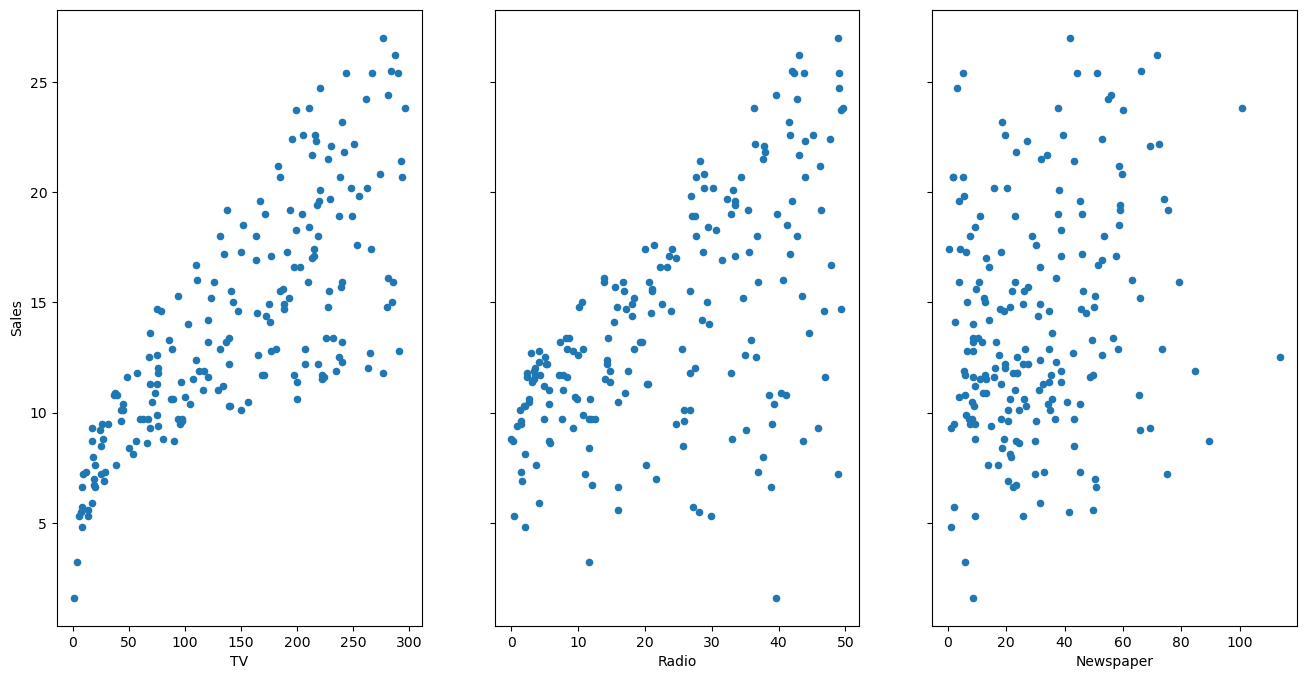

In [30]:
# Plotting Graph

fig,axs= plt.subplots(1,3,sharey=True)
df.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
df.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
df.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

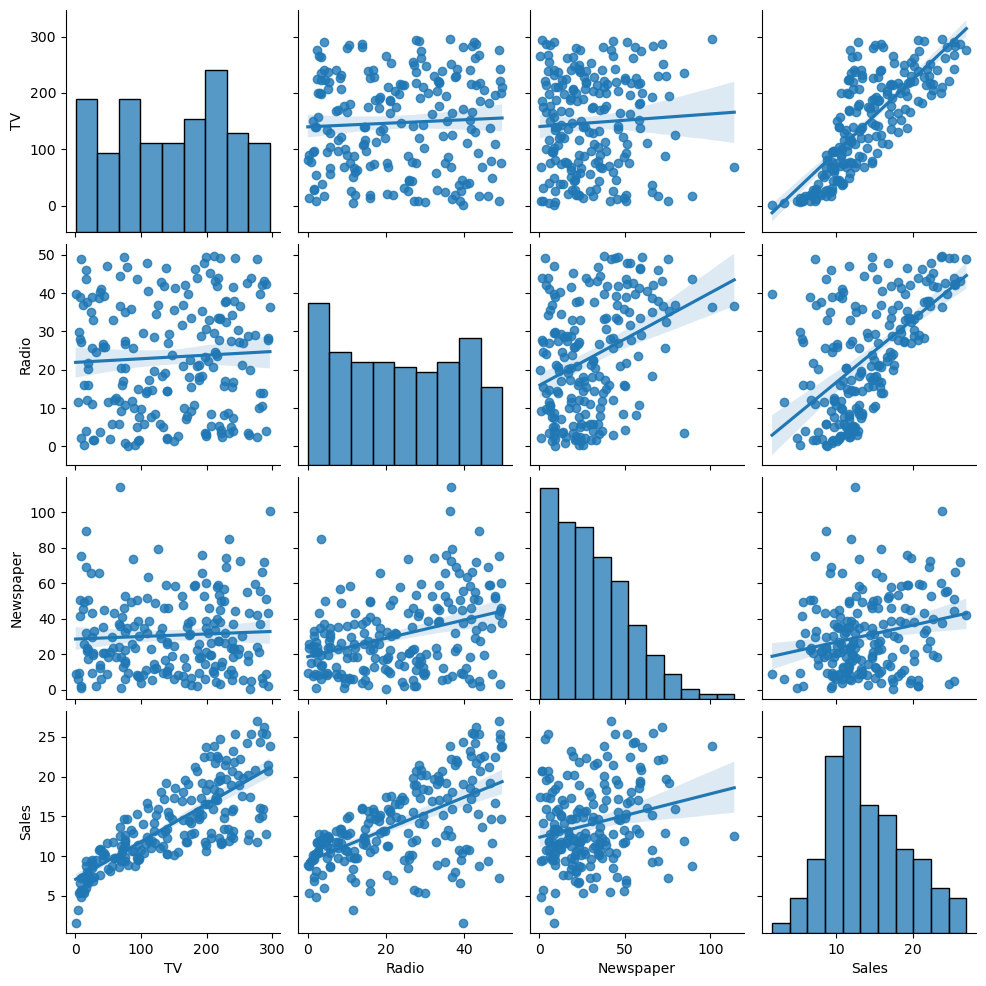

In [32]:
sns.pairplot(df,kind="reg");

In [33]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [34]:
df=df[df['Newspaper']<=90]
df.shape

(198, 4)

In [37]:
x=df.drop(columns=['Sales'])
y=df['Sales']
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [38]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [40]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.tail()

,TV,Radio,Newspaper
78,5.4,29.9,9.4
102,280.2,10.1,21.4
146,240.1,7.3,8.7
111,241.7,38.0,23.2
74,213.4,24.6,13.1


In [43]:
y_test.tail()

107     8.7
23     15.5
136     9.5
69     22.3
13      9.7
Name: Sales, dtype: float64

In [44]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9525930628117137

In [45]:
pipe.predict([[283.6,42.0,66.2]])

array([25.39])

In [46]:
pipe.predict([[112.9,17.4,38.6]])

array([12.51])

In [49]:
import pickle
pickle.dump(pipe,open('sales.pkl','wb'))